In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imblearn openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn import over_sampling
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data1_df  = pd.read_excel('/content/credit_risk_file_1.xlsx')

In [ ]:
data1_df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [ ]:
data2_df = pd.read_excel('/content/credit_risk_file_2.xlsx')
data2_df

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


In [ ]:
combined_df = pd.merge(data1_df, data2_df, on = 'PROSPECTID', how = 'inner')
combined_df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


Нужно сначала определить: сбалансированы ли данные.
Это влияет на подбор предобработки, на выбор метрик и модели.

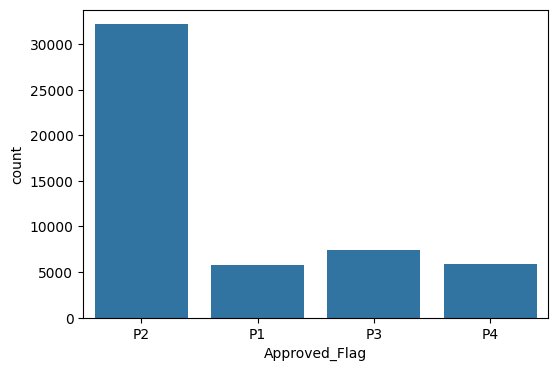

In [ ]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'Approved_Flag', data = combined_df)
plt.show()

Text(0.5, 1.0, 'who was approved by level')

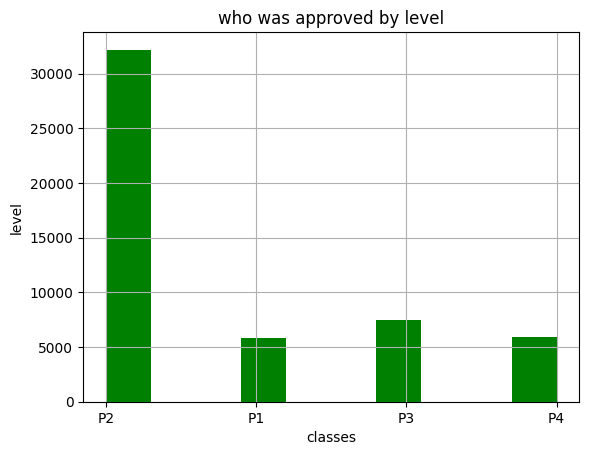

In [ ]:
df = combined_df.copy()
ax = df["Approved_Flag"].hist(orientation='vertical', color ='green')
ax.set_xlabel('classes')
ax.set_ylabel('level')
ax.set_title('who was approved by level')

In [ ]:
le = LabelEncoder()
combined_df['Approved_Flag'] = le.fit_transform(combined_df['Approved_Flag']) #Переводим все категориальные признаки в числовой формат

In [ ]:
combined_df['Approved_Flag']

,Approved_Flag
0,1
1,1
2,1
3,1
4,0
...,...
51331,3
51332,0
51333,2
51334,1


In [ ]:
corr = combined_df.select_dtypes(include=np.number).corr() #смотрим какие параметры с какими коррелируют (1.000000 на стыке). Если он естьЭ это либо один и тотже признак, либоразные, но похожие. Ихможно убрать, чтобы снизить нагрузку на модель
corr #даже если корреляция 0.95 не стоит убирать столбцы, т.к. такое маленькое колебание все равно важно для выбора

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score,Approved_Flag
PROSPECTID,1.000000,-0.001858,0.000154,-0.006221,-0.002460,0.002525,-0.001665,0.005634,-0.004829,0.004829,...,-0.001352,0.003666,0.006387,0.002112,0.006415,-0.002104,0.003321,-0.000242,-0.008003,-0.009537
Total_TL,-0.001858,1.000000,0.956367,0.652481,0.408441,0.453666,-0.074973,-0.002687,-0.263300,0.263300,...,0.225026,0.071978,0.099260,0.031548,0.073229,0.176329,0.409390,0.098204,0.202859,-0.109168
Tot_Closed_TL,0.000154,0.956367,1.000000,0.402606,0.236070,0.388155,-0.140151,0.020013,-0.383012,0.383012,...,0.153221,0.020372,0.049458,-0.012132,0.029816,0.047898,0.417535,0.068004,0.206652,-0.116916
Tot_Active_TL,-0.006221,0.652481,0.402606,1.000000,0.667361,0.414587,0.128623,-0.060328,0.168503,-0.168503,...,0.307603,0.172670,0.182706,0.130309,0.152096,0.428211,0.199662,0.131294,0.099566,-0.038780
Total_TL_opened_L6M,-0.002460,0.408441,0.236070,0.667361,1.000000,0.505473,0.529940,0.087148,0.096540,-0.096540,...,0.244400,0.276576,0.223809,0.256616,0.213443,0.312958,0.120232,0.009713,-0.112826,0.123776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
max_unsec_exposure_inPct,-0.002104,0.176329,0.047898,0.428211,0.312958,0.130866,0.253858,-0.090238,0.330022,-0.330022,...,0.317171,0.227780,0.165445,0.205231,0.152432,1.000000,-0.097631,-0.010389,-0.066947,0.079222
HL_Flag,0.003321,0.409390,0.417535,0.199662,0.120232,0.140065,-0.099421,-0.038575,-0.343173,0.343173,...,0.006393,-0.030335,-0.002646,-0.040392,-0.007460,-0.097631,1.000000,0.015256,0.162458,-0.104577
GL_Flag,-0.000242,0.098204,0.068004,0.131294,0.009713,0.014198,-0.053952,-0.043672,0.014589,-0.014589,...,0.076200,-0.019397,0.012439,-0.030617,0.004384,-0.010389,0.015256,1.000000,0.149753,-0.111277
Credit_Score,-0.008003,0.202859,0.206652,0.099566,-0.112826,0.031527,-0.255157,-0.065349,-0.182756,0.182756,...,0.037956,-0.378722,-0.202295,-0.387340,-0.204150,-0.066947,0.162458,0.149753,1.000000,-0.835461


In [ ]:
mask = np.triu(np.ones_like(corr, dtype = bool)) # Рассмотрим только нижнюю треугольную матрицу, так как признаки скоррелированы зеркально
#Отрезает верхнуюю треугольную матрицу по 1.00000 (np.like_ones(corr, dtype = bool))

<Axes: >

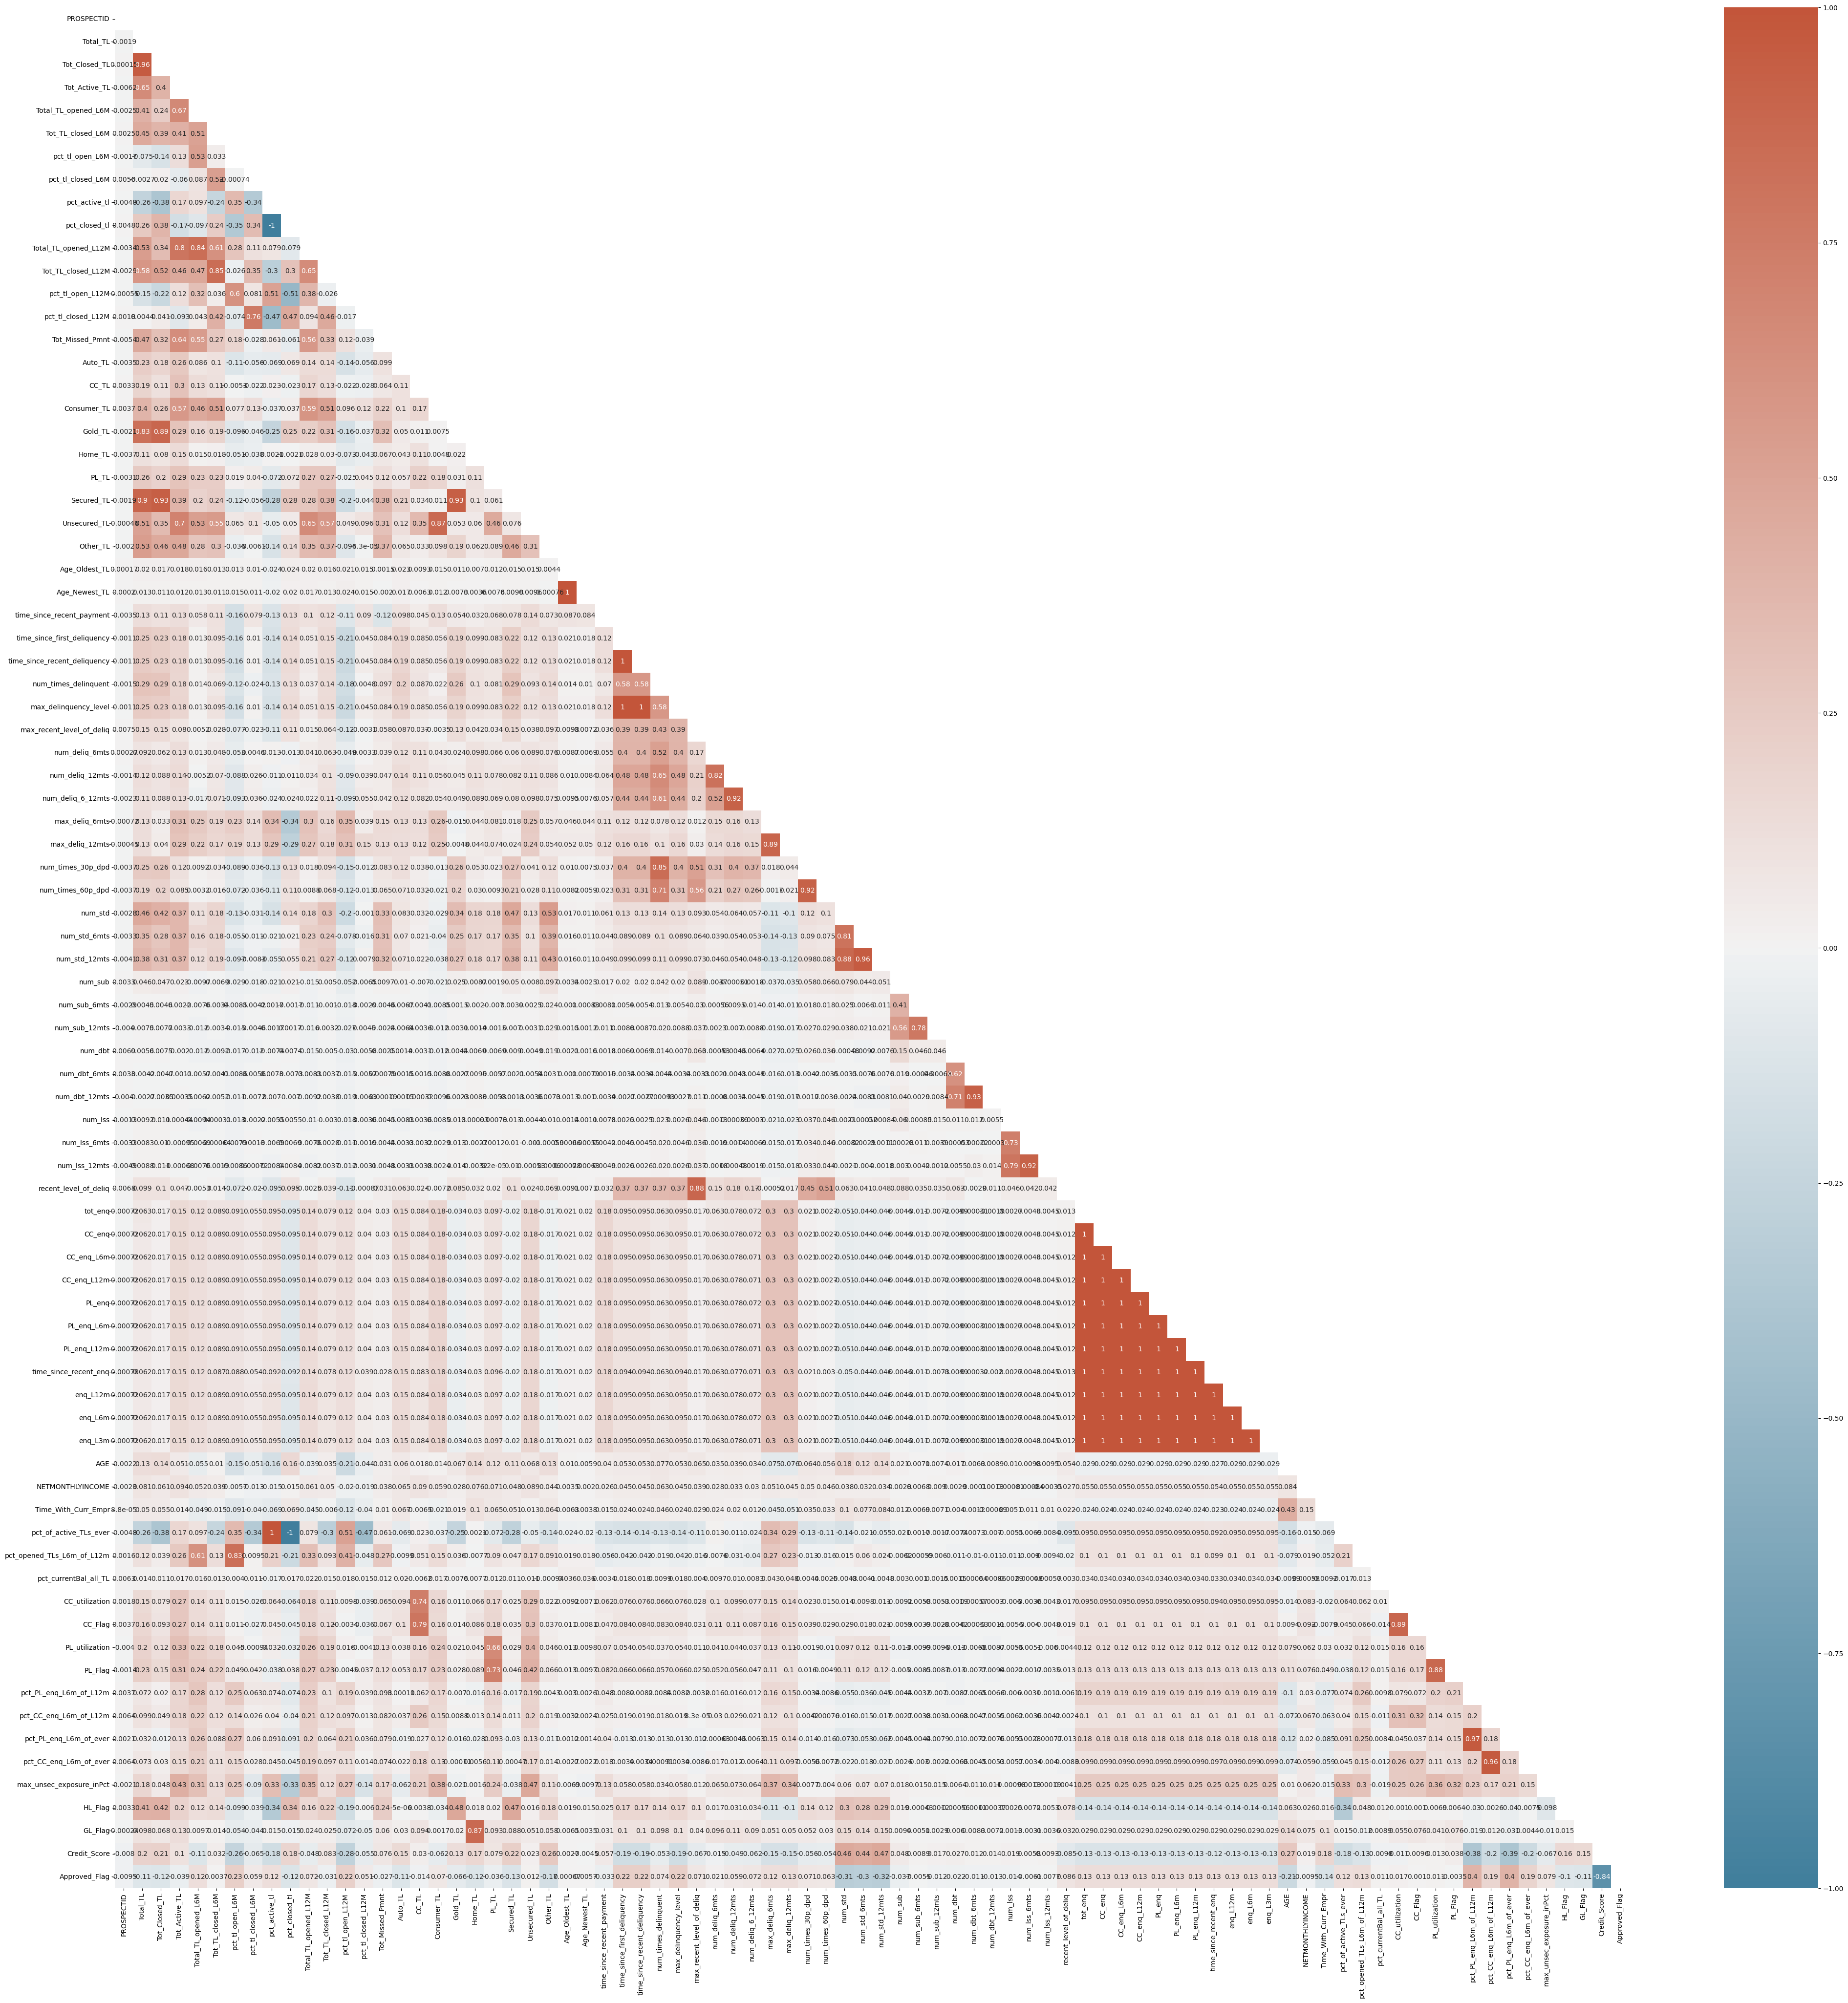

In [ ]:
f,ax = plt.subplots(figsize=(50, 50))
cmap = sns.diverging_palette(230, 20, as_cmap= True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)

In [ ]:
upper_triangle = corr.abs().where(np.triu(mask, k = 1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] == 1)]
to_drop

['pct_of_active_TLs_ever']

In [ ]:
combined_df = combined_df.drop(columns=to_drop, axis = 1)

In [ ]:
print('Num of missing values')
print(combined_df.isnull().sum().sum())

Num of missing values
0


# Разделение данных на числовые и категориальные
* Убираем данные, которые могут попомчь модели смухлевать

In [ ]:
x = combined_df.drop(columns=['PROSPECTID', 'Approved_Flag', 'Credit_Score'])
y = combined_df['Approved_Flag']

In [ ]:
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M',
       'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M',
       'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M',
       'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M',
       'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL',
       'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL',
       'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts',

In [ ]:
categorical_features = x.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2'],
      dtype='object')

In [ ]:
x[categorical_features].nunique()

,0
MARITALSTATUS,2
EDUCATION,7
GENDER,2
last_prod_enq2,6
first_prod_enq2,6


# Предобработка данных

In [ ]:
preprocessor = ColumnTransformer([ #компанует весь пайплайн обработки данных
    ('num', Pipeline([ # конвееры обработки данных
        ('imputer', SimpleImputer(strategy = 'median')), # очистка данных (0 будут заменяться на медианы)
        ('scaler', StandardScaler()) # создает диапазон значений
    ]), numeric_features),
    ('cat',  Pipeline([
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
    ]), categorical_features)
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y) # разбиение с равным кол-вом классов, т.к. есть дисбаланас в "Approved_Flag"
preprocessed_x_train = preprocessor.fit_transform(x_train)
preprocessed_x_test = preprocessor.transform(x_test)

In [ ]:
preprocessed_x_train

array([[-0.39369795, -0.12630582, -0.90787193, ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.71994241,  0.04191079,  2.15138575, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.41596763,  1.5558603 ,  0.4032385 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
y_train

,Approved_Flag
50116,1
20307,1
29272,1
4417,1
831,3
...,...
38239,0
41713,2
33444,1
51324,0


In [ ]:
feature_names = preprocessor.get_feature_names_out()
len(feature_names)

101

# Избавляемся от дисбаланаса
* генерим синтетику

In [ ]:
smote = over_sampling.SMOTE(random_state = 42)
x_res, y_res = smote.fit_resample(preprocessed_x_train, y_train)


In [ ]:
x_res

array([[-0.39369795, -0.12630582, -0.90787193, ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ],
       [-0.532903  , -0.46273904, -0.47083512, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.44013347, -0.29452243, -0.61662028, ...,  0.        ,
         0.        ,  0.33357639],
       [-0.15053268, -0.46273904,  0.72962357, ...,  0.        ,
         0.        ,  1.        ],
       [-0.45723991, -0.3713071 , -0.47083512, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(preprocessed_x_train)

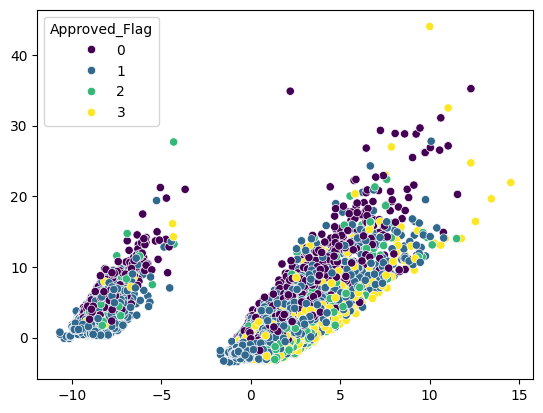

In [ ]:
sns.scatterplot(x=x_pca[:, 0], y = x_pca[:, 1], hue = y_train, palette = 'viridis')
plt.show()

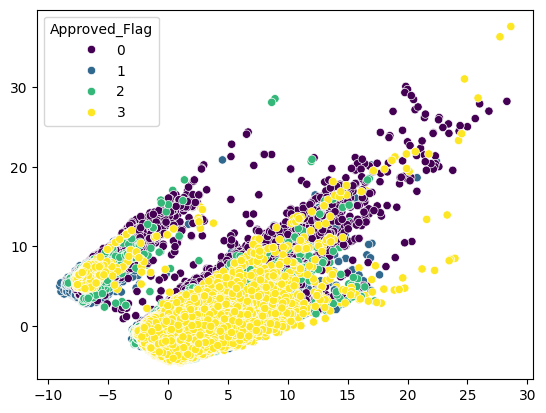

In [ ]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_res)
sns.scatterplot(x=x_pca[:, 0], y = x_pca[:, 1], hue = y_res, palette = 'viridis')
plt.show()

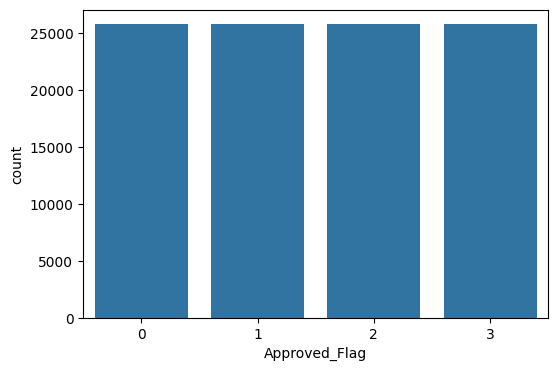

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_res)
plt.show()

# Обучение ML моделей

In [ ]:
lr_model = LogisticRegression(max_iter = 1000)
lr_params = {
    'C': np.logspace(-4, 2, 7) # отвечает за коэффициент регуляризации
}

In [ ]:
lr_search = RandomizedSearchCV(
    lr_model, lr_params, n_iter=5, scoring = "f1", cv = 4, n_jobs = -1, random_state = 42)
lr_search.fit(x_res, y_res) # cv = 4 берем 3 из 4 колокни и проверяем 4, потом другие 4 и проверяем оставшуюся

RandomizedSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
                   random_state=42, scoring='f1')

In [ ]:
def evaluate_model(model):
  y_pred = model.predict(preprocessed_x_test)
  print(classification_report(y_test, y_pred))

In [ ]:
evaluate_model(lr_search.best_estimator_)

              precision    recall  f1-score   support

           0       0.41      0.82      0.55      1161
           1       0.86      0.54      0.66      6440
           2       0.26      0.33      0.29      1491
           3       0.40      0.68      0.50      1176

    accuracy                           0.56     10268
   macro avg       0.48      0.59      0.50     10268
weighted avg       0.67      0.56      0.58     10268



In [ ]:
xgb_model = xgb.XGBClassifier()

xgb_params = {
    'max_depth': [7, 9, 10],
    'gamma': [0.1, 0.15, 0.3],
    'alpha': [0.1, 0.15, 0.3],
    'reg_lambda': [1.5, 2, 2.5],
    'learning_rate': [0.02, 0.05, 0.1],
    'n_estimators': [200, 300, 400]
}

In [ ]:
xgb_search = RandomizedSearchCV(
    xgb_model, xgb_params, n_iter=10, scoring="f1", cv=4, n_jobs=-1, random_state=42
)
xgb_search.fit(x_res, y_res)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.15, 0.3],
                                        'gamma': [0.1, 0.15, 0.3],
                                        'learning_rate': [0.02, 0.05, 0.1],
                                        'max_depth': [7, 9, 10],
                                        'n_estimators': [200, 300, 400],
                                        'reg_lambda': [1.5, 2, 2.5]},
                   random_state=42, scoring='f1')

In [ ]:
xgb_search.best_params_

{'reg_lambda': 1.5,
 'n_estimators': 200,
 'max_depth': 9,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'alpha': 0.15}

In [ ]:
# {'reg_lambda': 1.5, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.3, 'alpha': 0.15}

In [ ]:
model = xgb.XGBClassifier(reg_lambda=1.5, n_estimators=200, max_depth=9, learning_rate=0.1, gamma=0.3, alpha=0.15)

In [ ]:
model.fit(x_res, y_res)

XGBClassifier(alpha=0.15, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, ...)

In [ ]:
evaluate_model(model)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1161
           1       0.86      0.91      0.88      6440
           2       0.46      0.32      0.38      1491
           3       0.76      0.78      0.77      1176

    accuracy                           0.80     10268
   macro avg       0.72      0.71      0.71     10268
weighted avg       0.78      0.80      0.79     10268

